ION Data Analyst Assignment

In [1]:
#import all the relevent packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import time

In [27]:
import matplotlib.dates as md

In [37]:
import datetime

In [4]:
#reading the data into DataFrame
data = pd.read_csv(r"\Users\sangeeta\Downloads\Assignment file for Data Analyst - assignment file.csv")

The next few cells transform the DataFrame to a required form

In [5]:
data.drop(columns=['Grid power', 'Grid energy consumption', 'Grid cumulative energy consumption', 'Application status', 'Total voltage', 'Current'], inplace=True)

In [93]:
data.head()

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,SOC diff,DateTime,Dates
0,1556701215000,1.0,25.229167,1.000000,0.0,1,NaN,737180.375174,2019-05-01 09:00:15+00:00
1,1556702215000,1.0,25.528210,0.999774,0.0,1,0.0,737180.386748,2019-05-01 09:16:55+00:00
2,1556703215000,1.0,25.859735,0.999679,0.0,1,0.0,737180.398322,2019-05-01 09:33:35+00:00
3,1556704215000,1.0,26.204830,0.999606,0.0,1,0.0,737180.409896,2019-05-01 09:50:15+00:00
4,1556705215000,1.0,26.553448,0.999542,0.0,1,0.0,737180.421470,2019-05-01 10:06:55+00:00


In [91]:
def time(timestamp):
    m = int(timestamp/1000)
    return datetime.datetime.utcfromtimestamp(m).replace(tzinfo=datetime.timezone.utc)
data['Dates'] = data['Timestamp'].apply(time)

In [92]:
#converts timestamp to format that plt.plot_date() can parse

def tim(timestamp):
    m = int(timestamp/1000)
    return md.date2num(datetime.datetime.utcfromtimestamp(m).replace(tzinfo=datetime.timezone.utc))
data['DateTime'] = data['Timestamp'].apply(tim)

In [94]:
data.corr()

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,SOC diff,DateTime
Timestamp,1.000000,-0.052751,-0.004988,-0.985722,0.999442,-0.002747,0.000426,1.000000
SOC,-0.052751,1.000000,-0.369040,0.054005,-0.053320,0.227947,0.120876,-0.052751
Temperature,-0.004988,-0.369040,1.000000,0.003684,-0.004896,-0.845026,-0.818760,-0.004988
SOH,-0.985722,0.054005,0.003684,1.000000,-0.984262,0.003190,-0.000540,-0.985722
Equivalent cycle,0.999442,-0.053320,-0.004896,-0.984262,1.000000,-0.002752,0.000625,0.999442
Grid status,-0.002747,0.227947,-0.845026,0.003190,-0.002752,1.000000,0.988081,-0.002747
SOC diff,0.000426,0.120876,-0.818760,-0.000540,0.000625,0.988081,1.000000,0.000426
DateTime,1.000000,-0.052751,-0.004988,-0.985722,0.999442,-0.002747,0.000426,1.000000


From the above Matrix it can be understood that, of the 3 pairs considered for the assignment, SOH and Equivalent Cycle show stong inverse linear correlation of -0.984. The same can be understood from the plot of the two given below

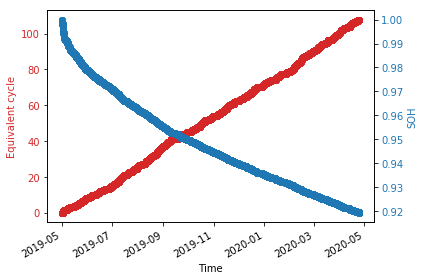

In [162]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Equivalent cycle', color=color)
ax1.plot_date(data['DateTime'], data['Equivalent cycle'], color=color, linestyle='solid')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SOH', color=color)  # we already handled the x-label with ax1
ax2.plot_date(data['DateTime'], data['SOH'], color=color, linestyle='solid')
ax2.tick_params(axis='y', labelcolor=color)
plt.gcf().autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [12]:
#difference in the consecutive values of SOC to understand its correlation with Grid status and temperature
data['SOC diff'] = data['SOC'].diff()

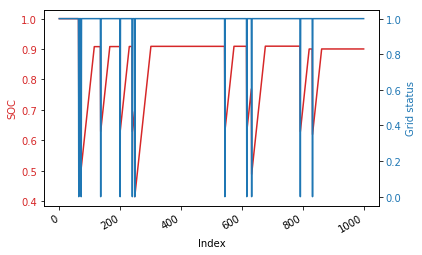

In [163]:
fig1, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('SOC', color=color)
ax1.plot(data.index[:1001], data.loc[:1000]['SOC'], color=color, linestyle='solid')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Grid status', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index[:1001], data.loc[:1000]['Grid status'], color=color, linestyle='solid')
ax2.tick_params(axis='y', labelcolor=color)
plt.gcf().autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Observing the data and the above plot for a small window, the grid status is binary and changes from 1 to 0 only when the SOC drops by more than 0.27.

In [113]:
data[data['Grid status']==0]['SOC diff'].min()

-0.302100881

In [125]:
k = data[data['Grid status']==0]

In [128]:
k.shape

(369, 9)

In [129]:
l = data[data['SOC diff']<-0.27]

In [130]:
l.shape

(368, 9)

In [124]:
k[k['SOC diff']>-0.27]

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,SOC diff,DateTime,Dates
26832,1583533215000,-0.005705,24.000186,0.925871,92.337792,0,0.0,737490.930729,2020-03-06 22:20:15+00:00


In [131]:
k.sort_values('SOC diff', ascending=False).head()

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,SOC diff,DateTime,Dates
26832,1583533215000,-0.005705,24.000186,0.925871,92.337792,0,0.000000,737490.930729,2020-03-06 22:20:15+00:00
64,1556765215000,0.721685,125.973128,0.997131,0.139157,0,-0.278315,737181.115914,2019-05-02 02:46:55+00:00
72,1556773215000,0.508074,126.845802,0.996159,0.310971,0,-0.278620,737181.208507,2019-05-02 05:00:15+00:00
136,1556837215000,0.628823,128.981402,0.994788,0.650383,0,-0.279037,737181.949248,2019-05-02 22:46:55+00:00
200,1556901215000,0.628721,135.607505,0.993498,0.929710,0,-0.279378,737182.689988,2019-05-03 16:33:35+00:00


In all cases where Grid status is 0 the SOC value has dropped drastically, and for all changes in SOC that are more or equal to 0.278315 Grid status has changes from 1 to 0. Thus it could be established as a relationship between SOC and Grid status.

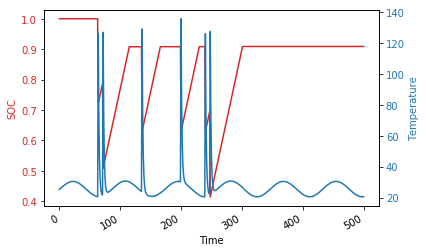

In [147]:
fig2, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('SOC', color=color)
ax1.plot(data.index[:501], data.loc[:500]['SOC'], color=color, linestyle='solid')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index[:501], data.loc[:500]['Temperature'], color=color, linestyle='solid')
ax2.tick_params(axis='y', labelcolor=color)
plt.gcf().autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [150]:
data['Temp diff'] = data['Temperature'].diff()

In [154]:
j = data[data['Temp diff']>1]

In [156]:
j.shape

(368, 10)

In [155]:
j['Temp diff'].min()

104.70783876000002

In [158]:
j['Temp diff'].mean()

105.41566954097823

As seen in the SOC vs Grid status, the number of times there has been a substantial drop in the SOC (more than 0.278,i.e., 'SOC diff'>-0.27 is 368 and j contains the spikes in the value of temperature which matches. Also there is no spike in temperature for which the SOC doesn't drop substantially as shown below.
Thus, it can be established as a relationship between SOC and temperature that the temperature is not affected and moves sinusoidal but surges by min 104 and average 105 when the SOC drops significantlly i.e. more than 0.278 as observed in the plot. 

In [161]:
j[j['SOC diff']>-0.27].shape

(0, 10)

In [195]:
data['Equivalent cycle'].corr(data['SOH'])

-0.9842624478536391